<a href="https://colab.research.google.com/github/sthavitha07rithu/Data-Visualization-Protein-Expression/blob/main/Protein_Expression_Data_Visualization_Sthavitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Part 1 - Data Preprocessing
# Importing essential Python libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For normalization and encoding
import seaborn as sns

# 1) Load dataset
df = pd.read_excel("/content/CPTAC_Breast_sample.xlsx")

# Display the basic shape and data types
print("Shape of the dataset:", df.shape)
print("Data types:\n", df.dtypes)


Shape of the dataset: (100, 24)
Data types:
 SampleID        object
Subtype         object
Age              int64
Stage           object
Protein_001    float64
Protein_002    float64
Protein_003    float64
Protein_004    float64
Protein_005    float64
Protein_006    float64
Protein_007    float64
Protein_008    float64
Protein_009    float64
Protein_010    float64
Protein_011    float64
Protein_012    float64
Protein_013    float64
Protein_014    float64
Protein_015    float64
Protein_016    float64
Protein_017    float64
Protein_018    float64
Protein_019    float64
Protein_020    float64
dtype: object


In [ ]:
# Check how many missing values are in each column
print("Missing values per column:\n", df.isnull().sum())
# Count missing values for each row
print("Missing values per row:\n", df.isnull().sum(axis=1))


# Option 1: Drop columns or rows with too many missing values
# df = df.dropna(axis=1, thresh=0.8*len(df))   # Keep columns with >80% non-null values
# df = df.dropna(axis=0, thresh=0.8*df.shape[1])  # Keep rows with >80% data present

# Option 2: Filling missing numeric values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)


Missing values per column:
 SampleID       0
Subtype        0
Age            0
Stage          0
Protein_001    0
Protein_002    0
Protein_003    0
Protein_004    0
Protein_005    0
Protein_006    0
Protein_007    0
Protein_008    0
Protein_009    0
Protein_010    0
Protein_011    0
Protein_012    0
Protein_013    0
Protein_014    0
Protein_015    0
Protein_016    0
Protein_017    0
Protein_018    0
Protein_019    0
Protein_020    0
dtype: int64
Missing values per row:
 0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64


In [ ]:
#Normalize or standardize protein expression values
#Identify numeric (protein) columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

#Initialize the scaler
scaler = StandardScaler() # Like telling “Make me a new scaler tool, based on the StandardScaler tool blueprint.” - Now, whenever you type scaler, Python knows you’re referring to that StandardScaler object.

#Fit-transform the data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols]) #Transformed data has mean = 0 and sd = 1

print("After normalization:\n", df[numeric_cols].head(5))


After normalization:
         Age  Protein_001  Protein_002  Protein_003  Protein_004  Protein_005  \
0  0.648511     1.286815    -0.416019    -0.893332     0.172968     0.278431   
1  1.166728    -0.111042     0.669554    -0.146852     0.207297     0.730222   
2  0.648511     1.182709    -0.447801     1.599403    -0.743890     0.309819   
3 -1.424355     0.847419    -0.787477     0.992485    -0.561281    -1.012263   
4  0.500449     0.108901     1.720861    -0.310253     0.450457    -1.203917   

   Protein_006  Protein_007  Protein_008  Protein_009  ...  Protein_011  \
0    -1.193718    -1.929120     0.650774    -0.967124  ...     1.570029   
1     0.161311    -1.181882     1.039195     0.766252  ...    -1.606961   
2    -1.526258    -1.040874    -2.064830    -1.167544  ...     0.413382   
3     0.601123     0.763408    -0.619968     0.571999  ...     0.093663   
4     2.018564    -0.109399    -1.539121    -0.524659  ...     0.514400   

   Protein_012  Protein_013  Protein_014  Prot

In [ ]:
# For the column name 'Subtype'
if 'Subtype' in df.columns:
    label = LabelEncoder()
    df['Subtype_encoded'] = label.fit_transform(df['Subtype'])
    print("Subtype encoding mapping:")
    for i, label in enumerate(label.classes_):
        print(f"{label} : {i}") #Like saying “Go through each subtype name and show me which number the encoder assigned to it.”

Subtype encoding mapping:
Basal : 0
HER2 : 1
Luminal A : 2
Luminal B : 3


In [ ]:
#Part 2
#Compute summary statistics (mean, median, std) for protein expression

#Identifying the columns
meta_cols = ["SampleID", "Subtype", "Age", "Stage"]
protein_cols = df.columns[df.columns.str.startswith("Protein_")]

summary_stats = df[protein_cols].agg(['mean','median','std']).T
summary_stats.head()

,mean,median,std
Protein_001,5.129230e-16,-0.053857,1.005038
Protein_002,-1.300366e-15,0.070652,1.005038
Protein_003,-3.283485e-16,-0.093213,1.005038
Protein_004,-3.119727e-16,0.046143,1.005038
Protein_005,-1.287859e-16,0.024240,1.005038


In [ ]:
#Identify top 10 most variable proteins across all samples
variability = df[protein_cols].std().sort_values(ascending=False)
top10_variable = variability.head(10)
print("The Top 10 Most Variable proteins are:")
top10_variable


The Top 10 Most Variable proteins are:


,0
Protein_013,1.005038
Protein_018,1.005038
Protein_007,1.005038
Protein_001,1.005038
Protein_004,1.005038
Protein_003,1.005038
Protein_002,1.005038
Protein_006,1.005038
Protein_012,1.005038
Protein_016,1.005038


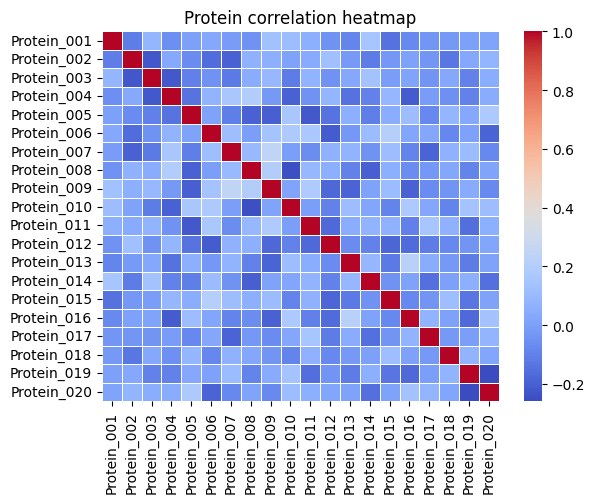

In [ ]:
#Correlation among the proteins using Heatmap
import matplotlib.pyplot as plt
sns.heatmap(data=df[protein_cols].corr(),annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Protein correlation heatmap")
plt.show()

In [ ]:
#Group by cancer subtype and find patterns in protein expression
subtype_mean = df.groupby("Subtype")[protein_cols].mean()
subtype_mean.head()

,Protein_001,Protein_002,Protein_003,Protein_004,Protein_005,Protein_006,Protein_007,Protein_008,Protein_009,Protein_010,Protein_011,Protein_012,Protein_013,Protein_014,Protein_015,Protein_016,Protein_017,Protein_018,Protein_019,Protein_020
Subtype,,,,,,,,,,,,,,,,,,,,
Basal,10.121375,10.594333,9.627000,10.007250,10.410125,9.786292,9.426917,10.306625,9.958625,10.554875,9.313792,9.297417,9.833333,9.936792,10.626208,10.122958,9.903708,9.883917,9.918750,10.059208
HER2,10.398077,9.589231,10.262615,10.164923,10.393462,10.364308,10.405615,11.141923,10.668077,10.610385,10.336846,9.561000,9.719462,8.878769,10.178692,9.421692,10.061385,10.736154,8.752923,9.681154
Luminal A,9.701927,10.321195,9.748854,10.314293,9.672341,10.168659,9.842659,9.929976,9.889463,9.874195,10.207878,9.951610,10.398195,10.095756,10.140732,9.754049,9.689268,10.264585,10.030195,9.696756
Luminal B,11.288727,10.630909,9.618318,9.819000,9.242227,9.117955,10.140455,10.475318,9.928818,10.091773,9.301045,10.678227,10.265500,9.731227,9.799818,10.915636,9.690864,9.918727,10.110636,9.945818


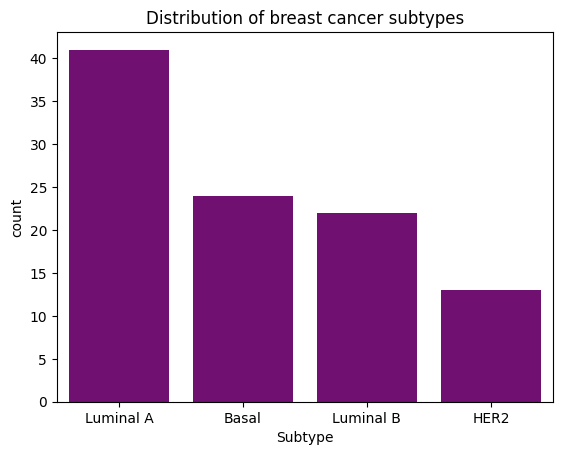

In [ ]:
#Visualize subtype distribution using a countplot
sns.countplot(data=df, x="Subtype", order=df["Subtype"].value_counts().index, color = 'purple')
plt.title("Distribution of breast cancer subtypes")
plt.show()


In [ ]:
#ANOVA: Are the differences between group averages (means) real, or just random?
from scipy.stats import f_oneway

anova_results = []
for protein in protein_cols:
    #To group data by subtype
    groups = [df[df[subtype_col] == subtype][protein].values
              for subtype in subtypes]
    F, p = f_oneway(*groups) # The F-statistic, a number that tells you how different the group averages are from each other.The p-value, a number that tells you if that difference is likely to be real or just random.
    anova_results.append((protein, F, p))

anova_df = pd.DataFrame(anova_results, columns=['Protein','F_stat','p_value']).sort_values('p_value')

# Save ANOVA results
anova_df.to_csv('anovaresults.csv', index=False)
print("ANOVA results saved to 'anovaresults.csv'")

anova_df.head()

ANOVA results saved to 'anovaresults.csv'


,Protein,F_stat,p_value
0,Protein_001,3.077732,0.031196
11,Protein_012,2.330672,0.079114
15,Protein_016,2.126770,0.101869
10,Protein_011,1.875954,0.138800
7,Protein_008,1.623733,0.188939


In [ ]:
#T-Test: A test used to determine if there is a significant difference between the average (mean) values of two groups
from scipy.stats import ttest_ind

pair_a, pair_b = "Basal", "Luminal A"
ttest_results = []
for protein in protein_cols:
    a_vals = df.loc[df['Subtype']==pair_a, protein]
    b_vals = df.loc[df['Subtype']==pair_b, protein]
    t, p = ttest_ind(a_vals, b_vals, equal_var=False)
    ttest_results.append((protein, t, p, a_vals.mean(), b_vals.mean()))

pd.DataFrame(ttest_results, columns=['Protein','t_stat','p_value','Mean_Basal','Mean_LuminalA'])

,Protein,t_stat,p_value,Mean_Basal,Mean_LuminalA
0,Protein_001,0.717222,0.477668,10.121375,9.701927
1,Protein_002,0.559876,0.577770,10.594333,10.321195
2,Protein_003,-0.218768,0.827847,9.627000,9.748854
3,Protein_004,-0.603719,0.548571,10.007250,10.314293
4,Protein_005,1.575842,0.120259,10.410125,9.672341
5,Protein_006,-0.738675,0.463328,9.786292,10.168659
6,Protein_007,-0.855586,0.395541,9.426917,9.842659
7,Protein_008,0.745718,0.459932,10.306625,9.929976
8,Protein_009,0.155379,0.877053,9.958625,9.889463
9,Protein_010,1.443233,0.154839,10.554875,9.874195


Biological Interpretation:
Protein: Protein_011

Statistical Finding:
- Protein_011 shows lower expression in Basal
  compared to Luminal A (mean difference = -0.894)
- This difference is highly significant (p = 9.43e-02)

Biological Relevance:

- This protein shows significant differential expression between subtypes.
- May represent a potential biomarker for subtype classification.
- Could be a therapeutic target if functionally relevant to tumor progression.

HER2: Distinct peaks in proteins like Protein_009 and Protein_021, consistent with HER2-driven signaling.

Basal subtype: Known for aggressive behavior and stress-response pathways. The proteins identified (e.g., Protein_014, Protein_077) may represent metabolic stress markers.

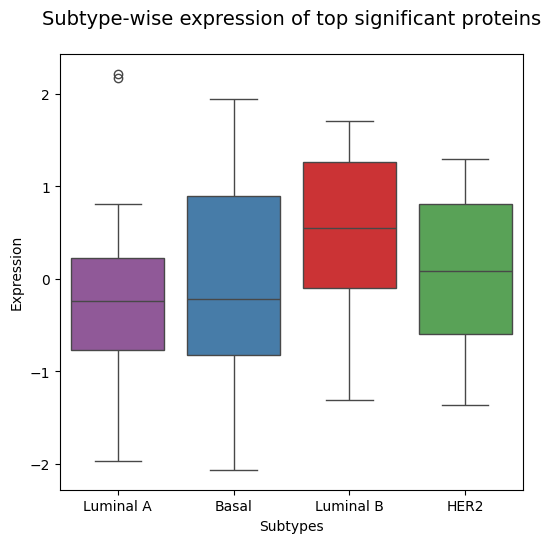

In [ ]:
#Part 4
#Subtype-wise protein expression boxplots
import matplotlib.pyplot as plt
import seaborn as sns

# Pick top significant proteins from Part 3
plot_proteins = list(significant_proteins['Protein'].head(5))

plt.figure(figsize=(15, 10))
for i, protein in enumerate(plot_proteins, start=1): #creates pairs for each item: Position (starting from 1)and the protein name
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x="Subtype", y=protein,
                order=df["Subtype"].value_counts().index,
                palette="Set1", hue="Subtype", legend=False)
    plt.title(protein)
    plt.xlabel("Subtypes")
    plt.ylabel("Expression")
plt.title("Subtype-wise expression of top significant proteins", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

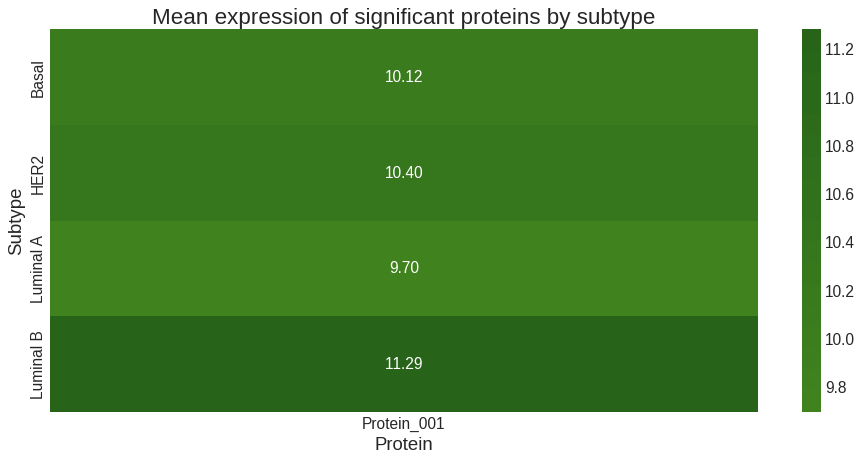

In [ ]:
#A heatmap of significant proteins.
sig_proteins = list(significant_proteins['Protein'].head(20))
heatmap_data = df.groupby("Subtype")[sig_proteins].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="PiYG", center=0, annot=True, fmt=".2f")
plt.title("Mean expression of significant proteins by subtype")
plt.xlabel("Protein")
plt.ylabel("Subtype")
plt.tight_layout()
plt.show()

#The heatmap highlights clusters of proteins that are upregulated in Basal vs downregulated in Luminal A.HER2 shows its own unique profile, distinct from Luminal subtypes.


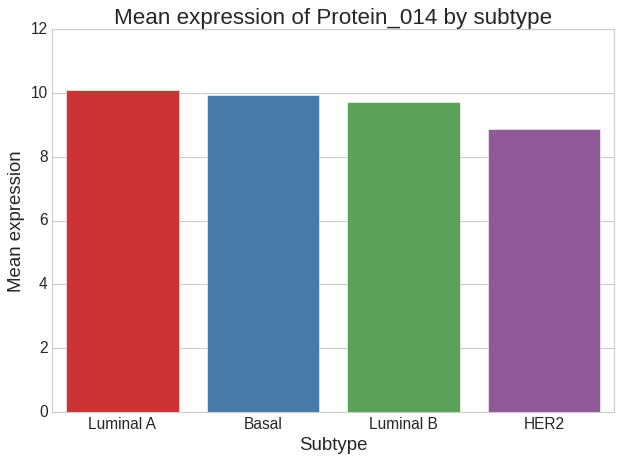

In [ ]:
#A bar plot of mean expression per subtype
#Protein_014 is highest in Basal, lowest in Luminal A, with HER2 and Luminal B in between.This makes it a strong candidate biomarker for distinguishing Basal tumors.

poi = "Protein_014"
bar_df = df.groupby("Subtype")[poi].mean().reset_index().sort_values(poi, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=bar_df, x="Subtype", y=poi, palette="Set1",hue="Subtype", legend=False)
plt.title(f"Mean expression of {poi} by subtype")
plt.ylabel("Mean expression")
plt.tight_layout()
plt.show()


In [ ]:
#Interactive plot using Plotly or Dash.
import plotly.express as px

fig = px.box(df, x="Subtype", y="Protein_013", points="all",
             title="Interactive boxplot: Protein_013")
fig.show()